# Terceira questão 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [77]:
#funcao de probabilidade w(X)
def w(x, mu, sigma):
    w = np.exp(-0.5 * (((x - mu) / sigma) ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return w

def proposal():
    return np.random.uniform(-10,10)


def metropolis_algoritmo(w,m,delta,n):
    amostras = []
    x = np.random.normal()
    sigma =1 
    mu = 0
    
    for i in range(m):
        pt = x + np.random.uniform(-delta, delta)
        r = w(pt, mu, sigma)/w(x, mu, sigma)
        if r >= 1 or np.random.uniform() < r:
            x = pt
        
        for i in range(n):
            pt = x + np.random.uniform(-delta, delta)
            r = w(pt, mu, sigma)/w(x, mu, sigma)
            if r >= 1 or np.random.uniform() < r:
                x = pt
            amostras.append(x)
            
        return amostras

In [78]:
mu = 0
sigma =1
m = 100000
delta = 0.5
n = 100000

samples = metropolis_algoritmo(w, m, delta, n)

pdf_x = np.linspace(mu - 4*sigma, mu +4*sigma, 100)
pdf_y = norm.pdf(pdf_x, mu, sigma)

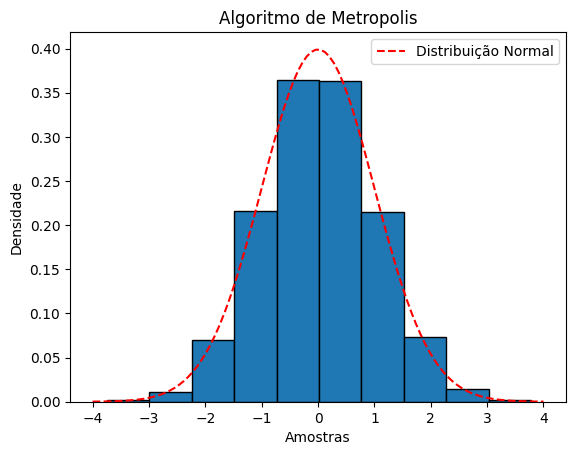

In [80]:
plt.hist(samples, density=True, bins = 10, edgecolor ='Black')
plt.plot(pdf_x, pdf_y, 'r--', label = 'Distribuição Normal')
plt.title('Algoritmo de Metropolis')
plt.xlabel("Amostras")
plt.ylabel("Densidade")
plt.legend()
plt.show()